# Formulas & Automata generators

The `spot.gen` package contains the functions used to generate the patterns produced by [`genltl`](https://spot.lrde.epita.fr/genltl.html) and [`genaut`](https://spot.lrde.epita.fr/genaut.html).

In [1]:
import spot
import spot.gen as sg
spot.setup()
from IPython.display import display

## LTL patterns

Generation of LTL formulas is done via the `ltl_pattern()` function.  This takes two arguments: a pattern id, and a pattern size (or index if the id refers to a list).

In [2]:
sg.ltl_pattern(sg.LTL_AND_GF, 3)

spot.formula("GFp1 & GFp2 & GFp3")

In [3]:
sg.ltl_pattern(sg.LTL_CCJ_BETA_PRIME, 4)

spot.formula("F(p & Xp & XXp & XXXp) & F(q & Xq & XXq & XXXq)")

To see the list of supported patterns, the easiest way is to look at the `--help` output of `genltl`.  The above pattern for instance is attached to option `--ccj-beta-prime`.  The name of the pattern identifier is the same using capital letters, underscores, and an `LTL_` prefix.  If a pattern has multiple aliased options in `genltl`, the first one used for the identifier (e.g., `genltl` accept both `--dac-patterns` and `--spec-patterns` as synonyms to denote the patterns of `spot.gen.LTL_DAC_PATTERNS`).

Multiple patterns can be generated using the `ltl_patterns()` function.  It's arguments should be either can be:
  - pairs of the form `(id, n)`: in this case the pattern `id` with size/index `n` is returned,
  - triplets of the form `(id, min, max)`: in this case the patterns are output for all `n` between `min` and `max` included,
  - an integer `id`: then this is equivalent to `(id, 1, 10)` if the pattern has now upper bound, or `(id, 1, upper)` if the patter `id` has an upper bound `upper`.  This is mostly used when the pattern id correspond to a hard-coded list of formulas.

Here is an example showing these three types of arguments:

In [4]:
for f in sg.ltl_patterns((sg.LTL_GH_R, 3), (sg.LTL_AND_FG, 1, 3), sg.LTL_EH_PATTERNS):
    display(f)

spot.formula("(GFp1 | FGp2) & (GFp2 | FGp3) & (GFp3 | FGp4)")

spot.formula("FGp1")

spot.formula("FGp1 & FGp2")

spot.formula("FGp1 & FGp2 & FGp3")

spot.formula("p0 U (p1 & Gp2)")

spot.formula("p0 U (p1 & X(p2 U p3))")

spot.formula("p0 U (p1 & X(p2 & F(p3 & XF(p4 & XF(p5 & XFp6)))))")

spot.formula("F(p0 & XGp1)")

spot.formula("F(p0 & X(p1 & XFp2))")

spot.formula("F(p0 & X(p1 U p2))")

spot.formula("GFp0 | FGp1")

spot.formula("G(p0 -> (p1 U p2))")

spot.formula("G(p0 & XF(p1 & XF(p2 & XFp3)))")

spot.formula("GFp1 & GFp2 & GFp3 & GFp0 & GFp4")

spot.formula("(p0 U (p1 U p2)) | (p1 U (p2 U p0)) | (p2 U (p0 U p1))")

spot.formula("G(p0 -> (p1 U (Gp2 | Gp3)))")

Some LTL patterns take two arguments.  In this case, the arguments passed to `ltl_pattern()` should be one of:
- `(id, n, m)` giving the value of both arguments,
- `(id, min1, max1, min2, max2)` specifying a range for both arguments,
- `(id, n)` equivalent to `(id, n, n)`,
- `id` equivalent to `(id, 1, 3, 1, 3)`.

In [5]:
for f in sg.ltl_patterns(sg.LTL_SEJK_F):
    display(f)

spot.formula("GFa1 U G(GFa0 U Xb)")

spot.formula("GFa1 U G(GFa0 U XXb)")

spot.formula("GFa1 U G(GFa0 U XXXb)")

spot.formula("GFa2 U G(GFa1 U G(GFa0 U Xb))")

spot.formula("GFa2 U G(GFa1 U G(GFa0 U XXb))")

spot.formula("GFa2 U G(GFa1 U G(GFa0 U XXXb))")

spot.formula("GFa3 U G(GFa2 U G(GFa1 U G(GFa0 U Xb)))")

spot.formula("GFa3 U G(GFa2 U G(GFa1 U G(GFa0 U XXb)))")

spot.formula("GFa3 U G(GFa2 U G(GFa1 U G(GFa0 U XXXb)))")

In [6]:
for f in sg.ltl_patterns((sg.LTL_SEJK_F, 2, 3), (sg.LTL_SEJK_F, 2), (sg.LTL_SEJK_F, 1, 2, 1, 2)):
    display(f)

spot.formula("GFa2 U G(GFa1 U G(GFa0 U XXXb))")

spot.formula("GFa2 U G(GFa1 U G(GFa0 U XXb))")

spot.formula("GFa1 U G(GFa0 U Xb)")

spot.formula("GFa1 U G(GFa0 U XXb)")

spot.formula("GFa2 U G(GFa1 U G(GFa0 U Xb))")

spot.formula("GFa2 U G(GFa1 U G(GFa0 U XXb))")

# Automata patterns

We currently have only a couple of generators of automata:

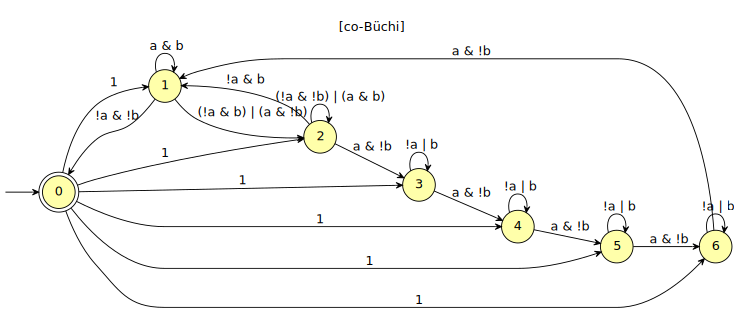

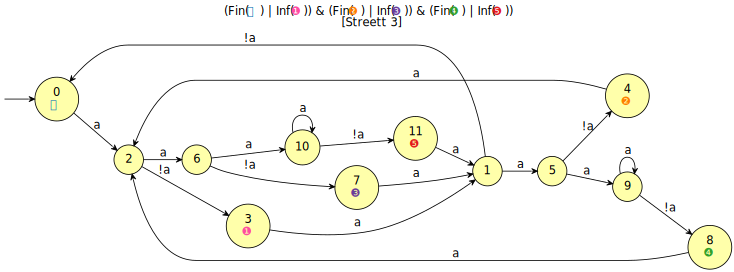

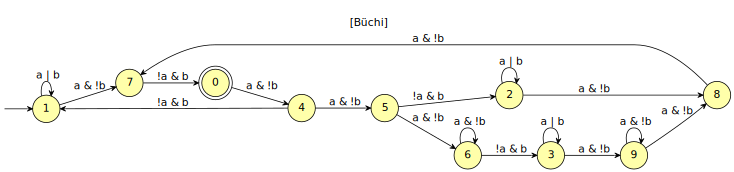

In [7]:
display(sg.aut_pattern(sg.AUT_KS_NCA, 3).show('.a'),
        sg.aut_pattern(sg.AUT_L_DSA, 3).show('.a'),
        sg.aut_pattern(sg.AUT_L_NBA, 3).show('.a'))

Multiple automata can be generated using the `aut_patterns()` function, which works similarly to `ltl_patterns()`.

In [8]:
for aut in sg.aut_patterns(sg.AUT_KS_NCA):
    print(aut.num_states())

3
5
7
9
11
13
15
17
19
21
